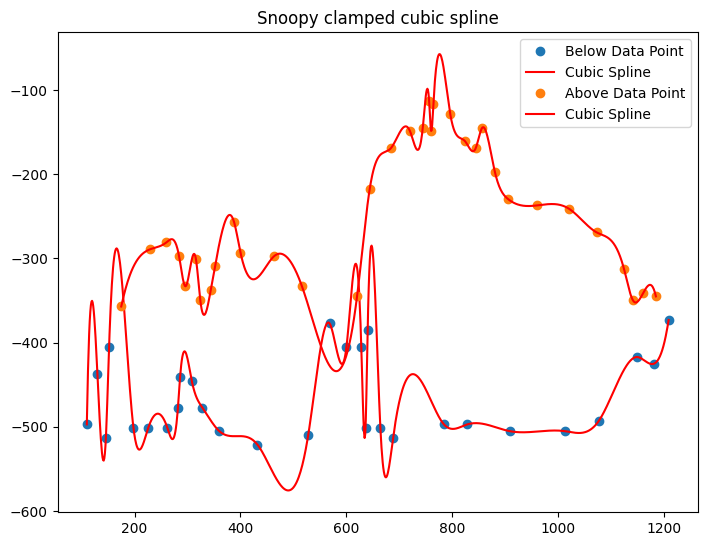

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import pandas as pd

coordinate = [np.array([[286, 441],[282, 477],[262, 501],[226, 501],
                        [198, 501],[146, 513],[110, 497],[110, 469],
                        [130, 437],[152, 405],[175, 357],[198, 313],
                        [230, 289],[260, 281],[284, 297],[296, 333],
                        [324, 349],[344, 337],[352, 309],[316, 301],
                        [316, 269],[352, 245],[388, 257],[400, 293],
                        [464, 297],[516, 333],[568, 377],[600, 405],
                        [628, 405],[640, 385],[620, 345],[620, 297],
                        [644, 217],[684, 169],[720, 149],[756, 113],
                        [764, 117],[744, 145],[796, 129],[760, 149],
                        [796, 145],[824, 161],[856, 145],[844, 169],
                        [880, 197],[904, 229],[960, 237],[1020, 241], 
                        [1072, 269],[1124, 313],[1140, 349],[1160, 341],
                        [1184, 345],[1208, 373],[1208, 413],[1180, 425],
                        [1148, 417],[1124, 457],[1076, 493],[1012, 505],
                        [908, 505],[828, 497],[784, 497],[756, 533],[720, 537],
                        [688, 513],[664, 501],[636, 501],[528, 509],[432, 521],
                        [360, 505],[328, 477],[308, 445],[284, 437]])]

x, y = [], []
for i in range(len(coordinate[0])) :
    x.append(coordinate[0][i][0])
    y.append((-1)*coordinate[0][i][1])

coordinate_df =pd.DataFrame({"x" : x,
                             "y" : y})
duplicate_index = coordinate_df[coordinate_df["x"].duplicated()].index
coordinate_df = coordinate_df.drop(duplicate_index, axis = 0) # Remove duplicate coordinate

x_below = coordinate_df["x"][coordinate_df["y"] < -370]
y_below = coordinate_df["y"][coordinate_df["y"] < -370]
x_above = coordinate_df["x"][coordinate_df["y"] >= -370]
y_above = coordinate_df["y"][coordinate_df["y"] >= -370]

x_interp_below = np.linspace(x_below.min(), x_below.max(), 1000)
y_linear_below = interp1d(x_below, y_below)
x_interp_above = np.linspace(x_above.min(), x_above.max(), 1000)
y_linear_above = interp1d(x_above, y_above)

y_cubic_below = interp1d(x_below, y_below, kind = "cubic") # This function require x must not have duplicate value.
y_cubic_above = interp1d(x_above, y_above, kind = "cubic") # This function require x must not have duplicate value.

fig = plt.figure()
axe = fig.add_axes([0, 0, 1, 1])
axe.plot(x_below, y_below, "o", label = "Below Data Point");
axe.plot(x_interp_below, y_cubic_below(x_interp_below), "red", label = "Cubic Spline");
axe.plot(x_above, y_above, "o", label = "Above Data Point");
axe.plot(x_interp_above, y_cubic_above(x_interp_above), "red", label = "Cubic Spline");
plt.title("Snoopy clamped cubic spline");
plt.legend();